# Documentation

Learning how this works:
[GitHub](https://github.com/ahmetozlu/signature_extractor.git)

In [35]:
import glob
import os
from IPython.display import display, Markdown
from tqdm import tqdm
from ipywidgets import FloatSlider, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [36]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from skimage.filters import threshold_otsu
from skimage import measure
from skimage import morphology
from skimage.color import label2rgb
from skimage.measure import regionprops
from skimage.draw import circle
from skimage.filters import gaussian
from skimage.segmentation import clear_border

In [52]:
path = "carta-laboral-images/CARTA LABORAL (50)-0.png"
outpath = "Example/"

Reading the image

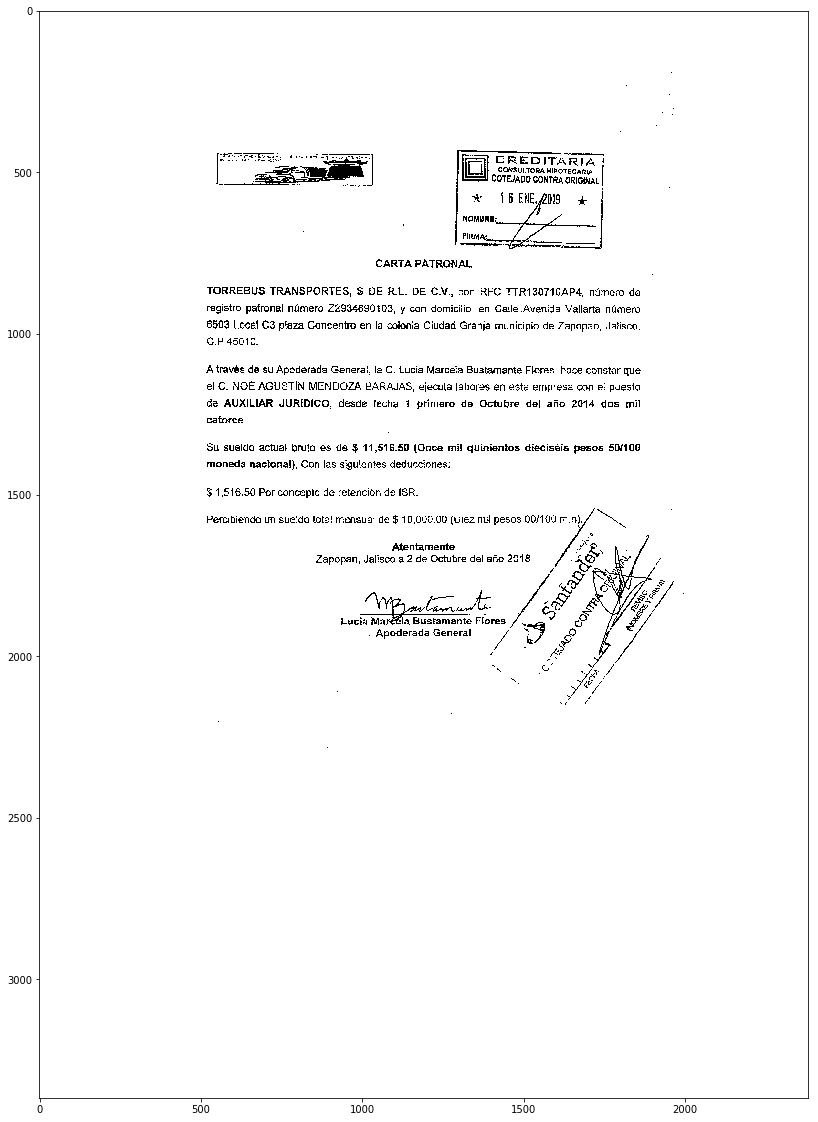

In [53]:
original = img = cv2.imread(f'{path}')
img = cv2.imread(f'{path}', 0)
img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(40,20))
plt.imshow(img,cmap="gray")
plt.show()

Text(0.5, 1.0, 'opening')

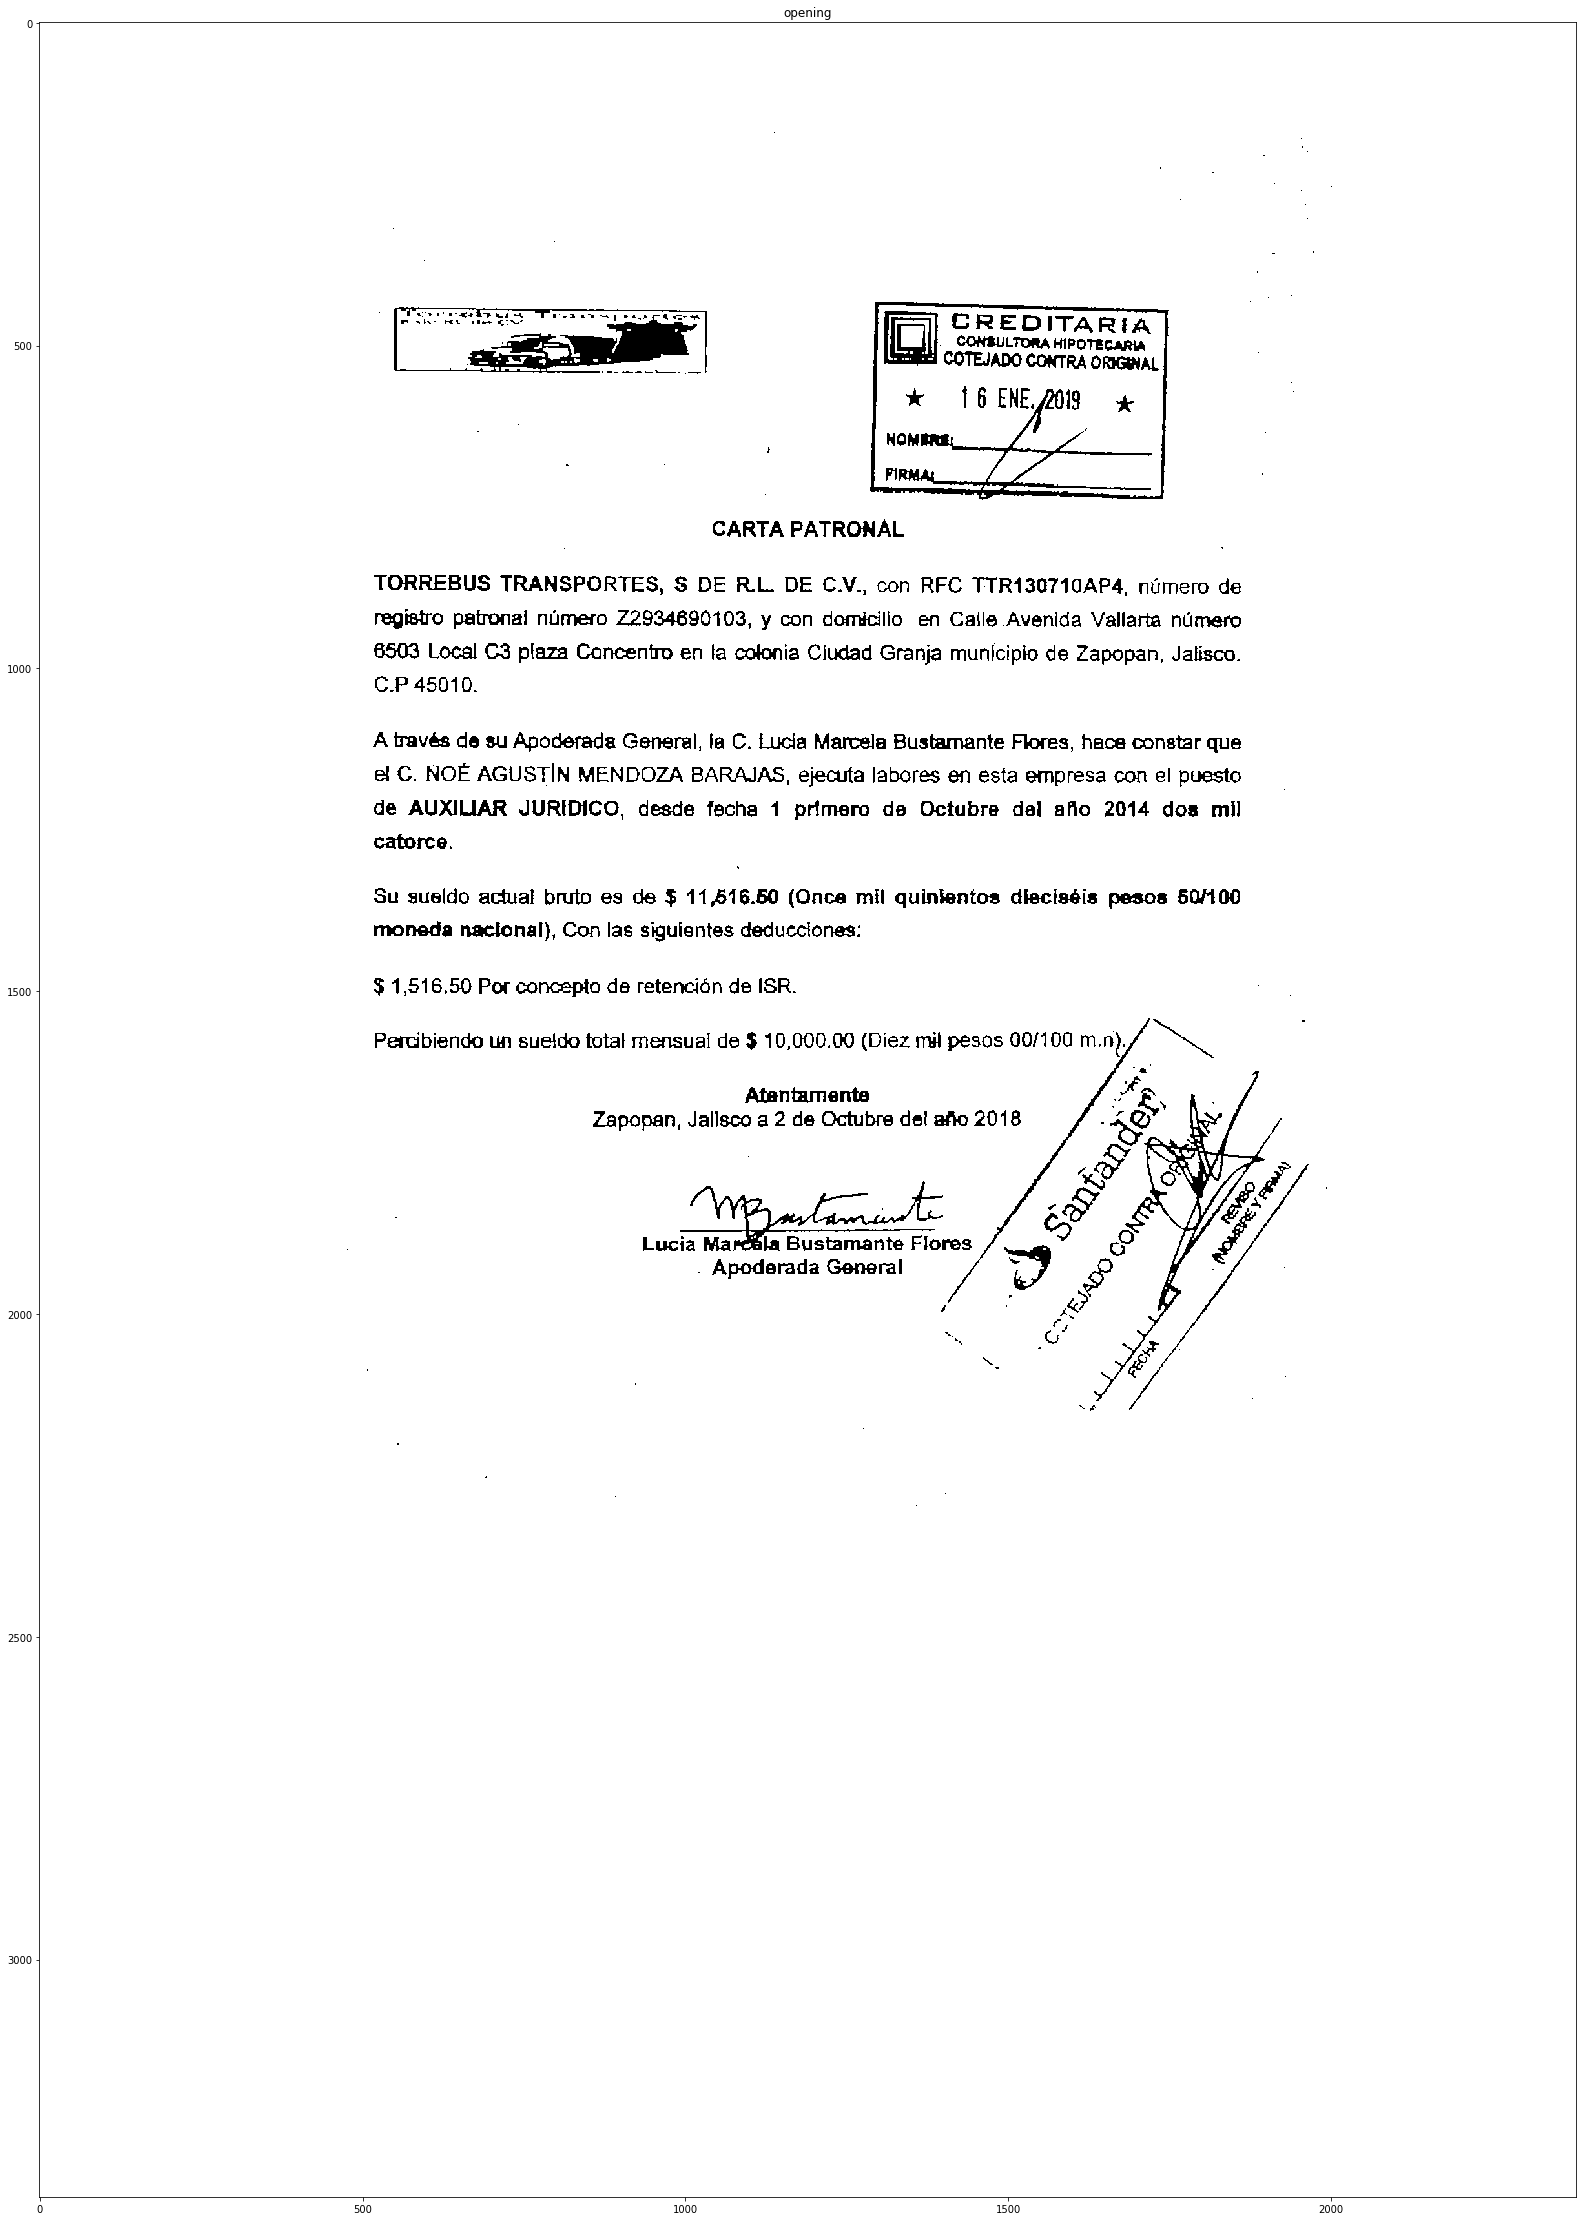

In [54]:
open_img = morphology.opening(img, morphology.square(3))

plt.figure(figsize = (40,40))
plt.imshow(open_img, cmap = "gray")
plt.title('opening')

Text(0.5, 1.0, 'gaussian')

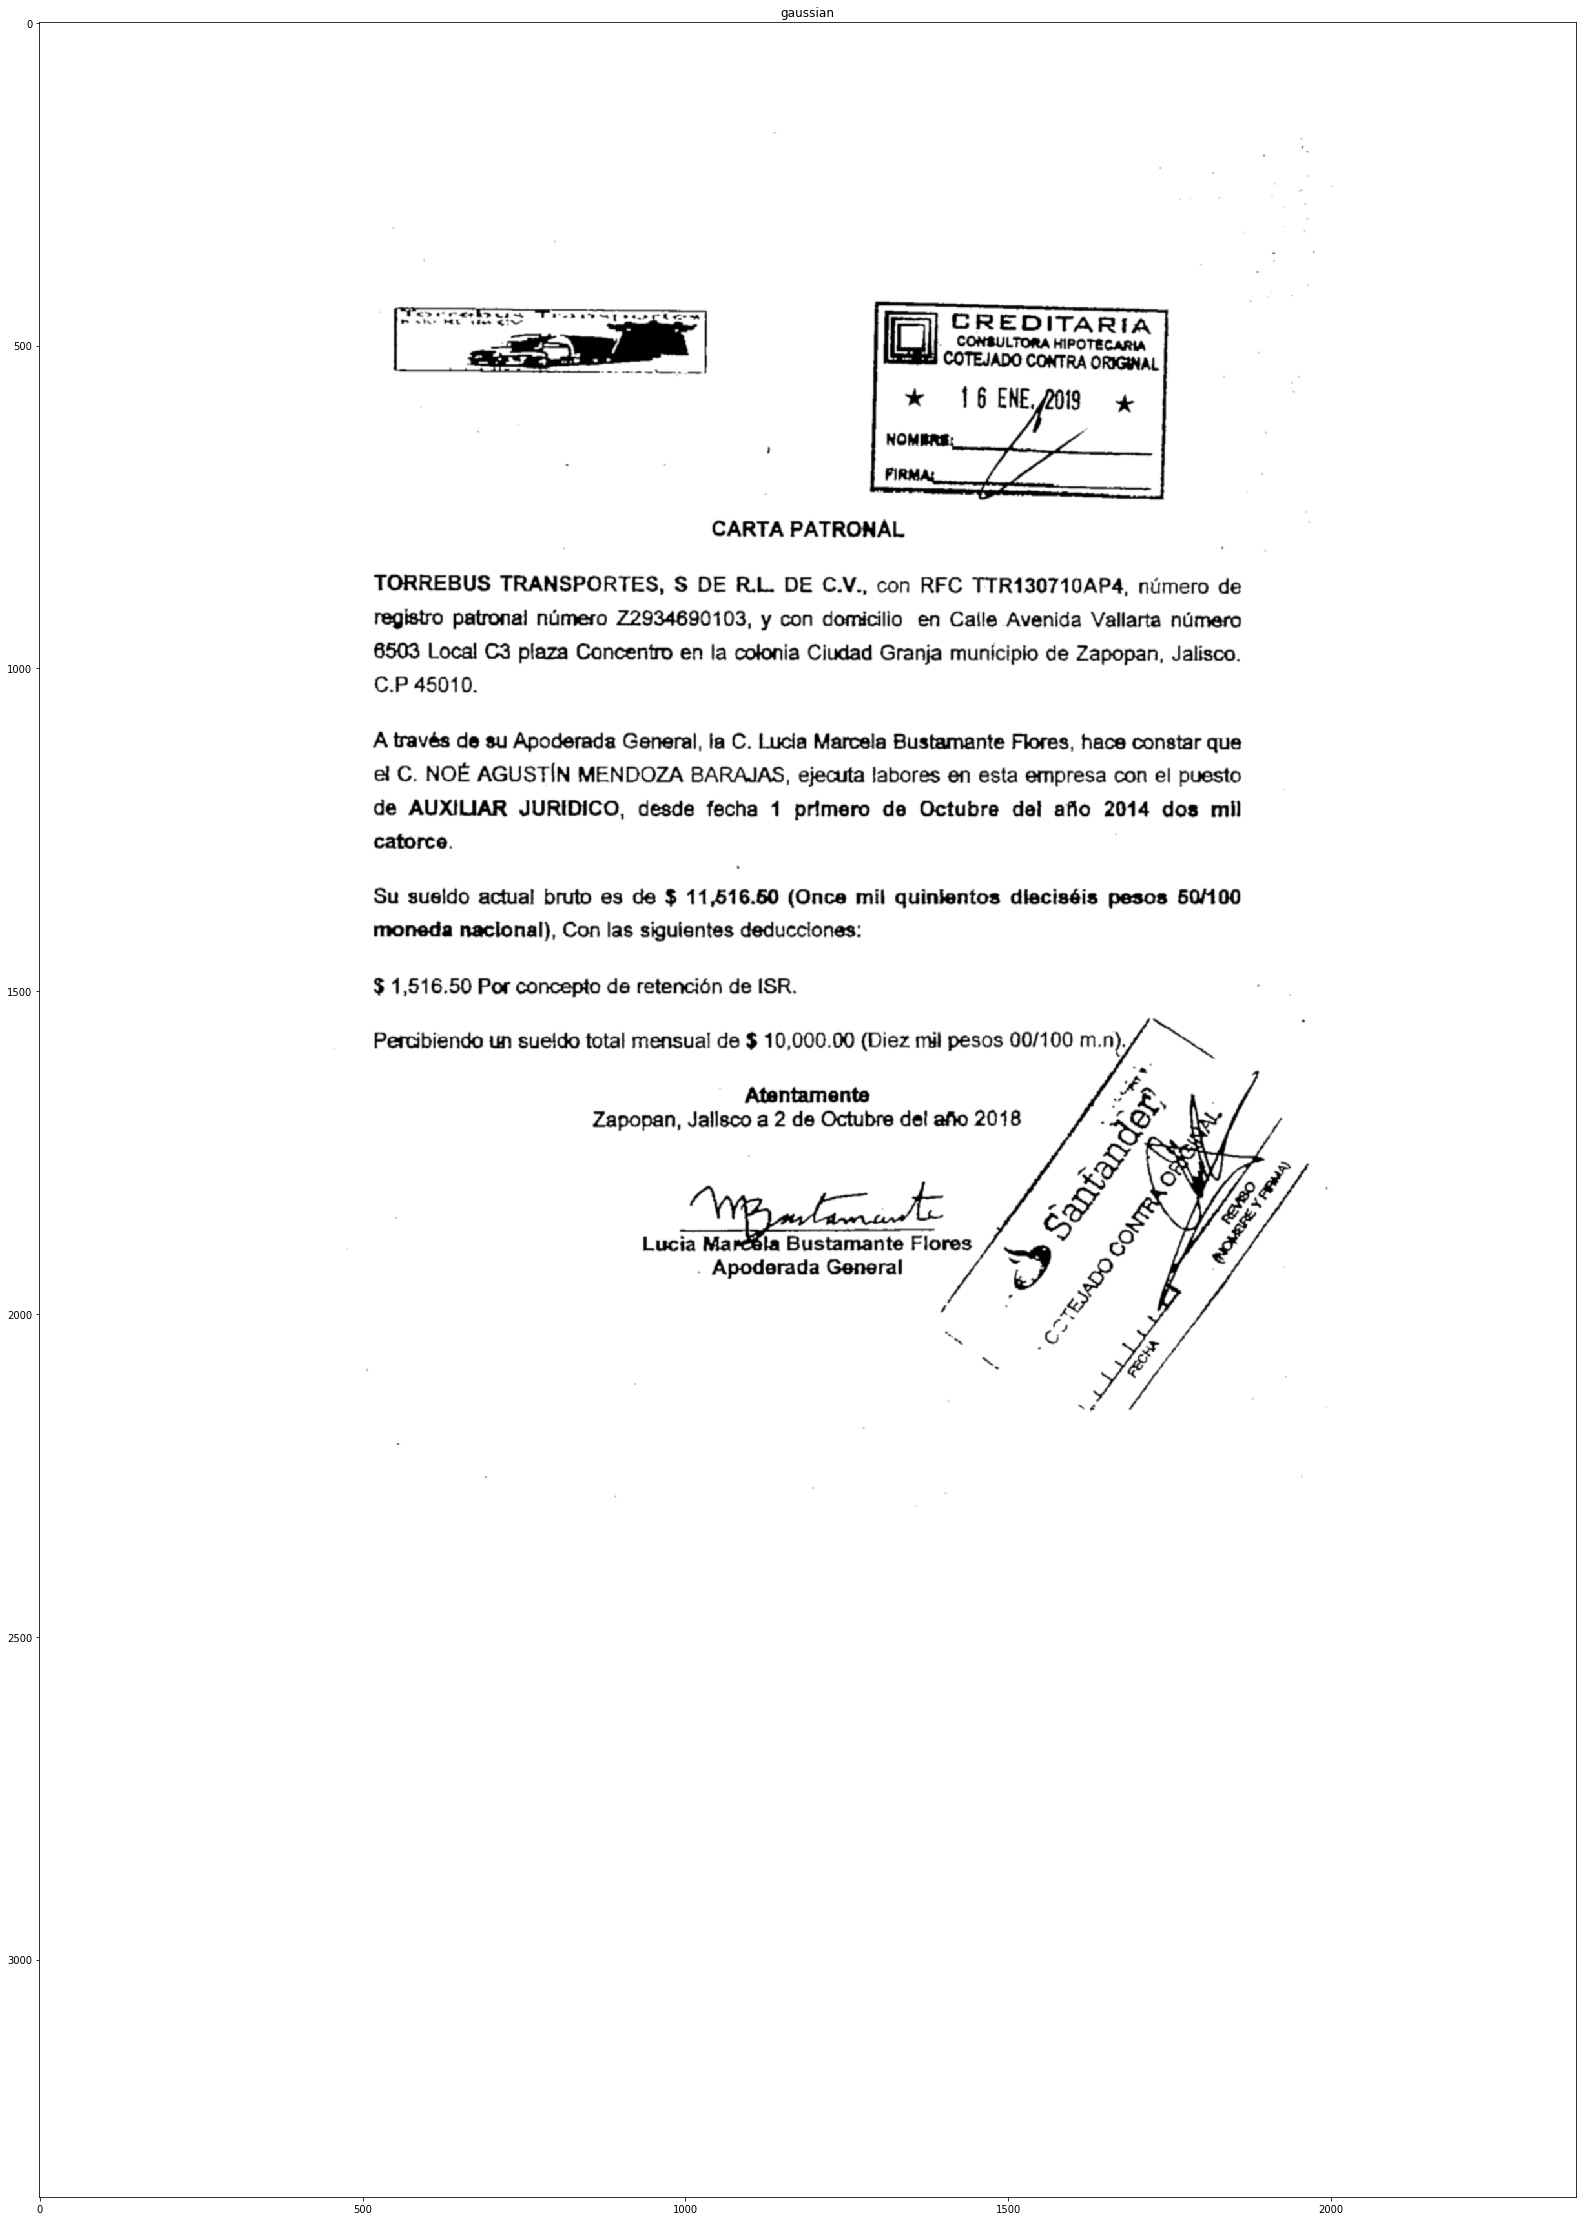

In [55]:
gaussian_img = gaussian(open_img)

plt.figure(figsize = (40,40))
plt.imshow(gaussian_img, cmap = "gray")
plt.title('gaussian')

Getting only the points above the mean
Is this a threshold?

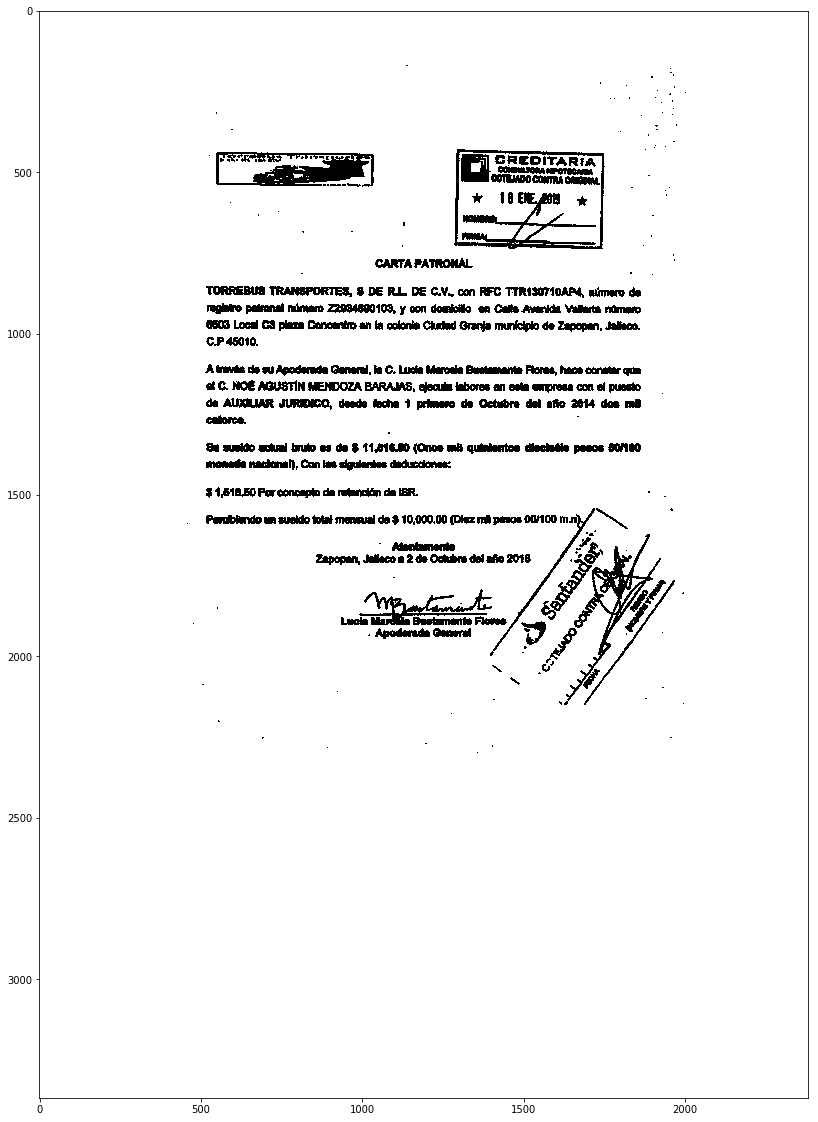

In [56]:
blobs = gaussian_img > gaussian_img.mean()

plt.figure(figsize=(40,20))
plt.imshow(blobs,cmap="gray")
plt.show()

Getting the connected points and labeling them.

Documentation: [Skimage](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.label)

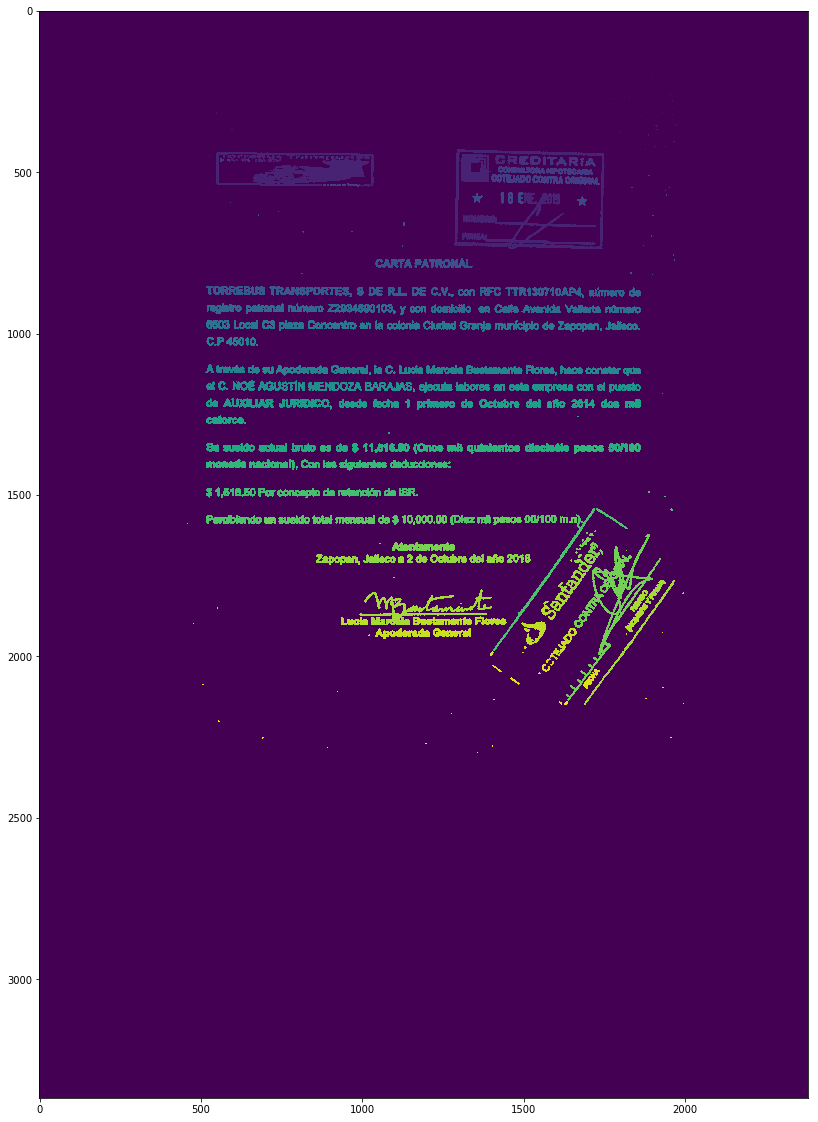

In [57]:
blobs_labels = measure.label(blobs, background=1)

plt.figure(figsize=(40,20))
plt.imshow(blobs_labels)
plt.show()

Colors the image based on the labels previously assigned

Documentation: [Skimage](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.label2rgb)

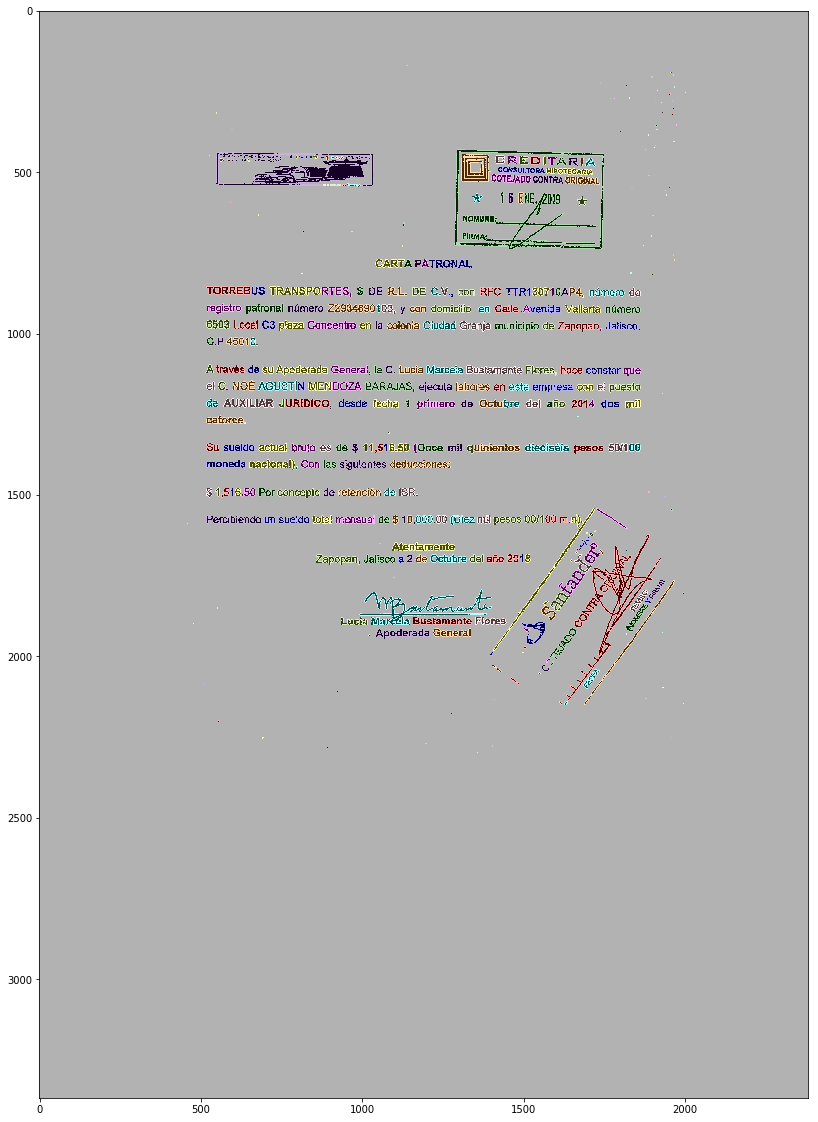

In [58]:
image_label_overlay = label2rgb(blobs_labels, image=img, bg_label=0)

plt.figure(figsize=(40,20))
plt.imshow(image_label_overlay)
plt.show()

**regionprops** returns regions based on the labels previously assigned

Documentation: [Skimage](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops)

Loop through the regions to get:
* the total area of the regions bigger than a min_area
* the number of regions

In [59]:
def get_a4_constant(blobs_labels, min_area):

    total_area = 0
    counter = 0
    for region in regionprops(blobs_labels):

        if region.area > min_area:
            total_area = total_area + region.area
            counter = counter + 1

    average = (total_area / counter)
    a4_constant = ((average / 84.0) * 250.0) + 100
    
    return a4_constant

Remove from a labeled array objects smaller than a min size

Documentation: [Skimage](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects)

In [60]:
a4_constant = get_a4_constant(blobs_labels, 300)
b = morphology.remove_small_objects(blobs_labels, a4_constant)

In [61]:
def draw_bbox(label_image, image):

    image_label_overlay = label2rgb(label_image, image=image, bg_label=0)
    
    # image_label_overlay_gray = cv2.cvtColor(image_label_overlay, cv2.COLOR_RGB2GRAY)
    
    
    fig, ax = plt.subplots(figsize=(40, 40))
    ax.imshow(image_label_overlay)
    
    regions = []

    for region in regionprops(label_image):
        # take regions with large enough areas

        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

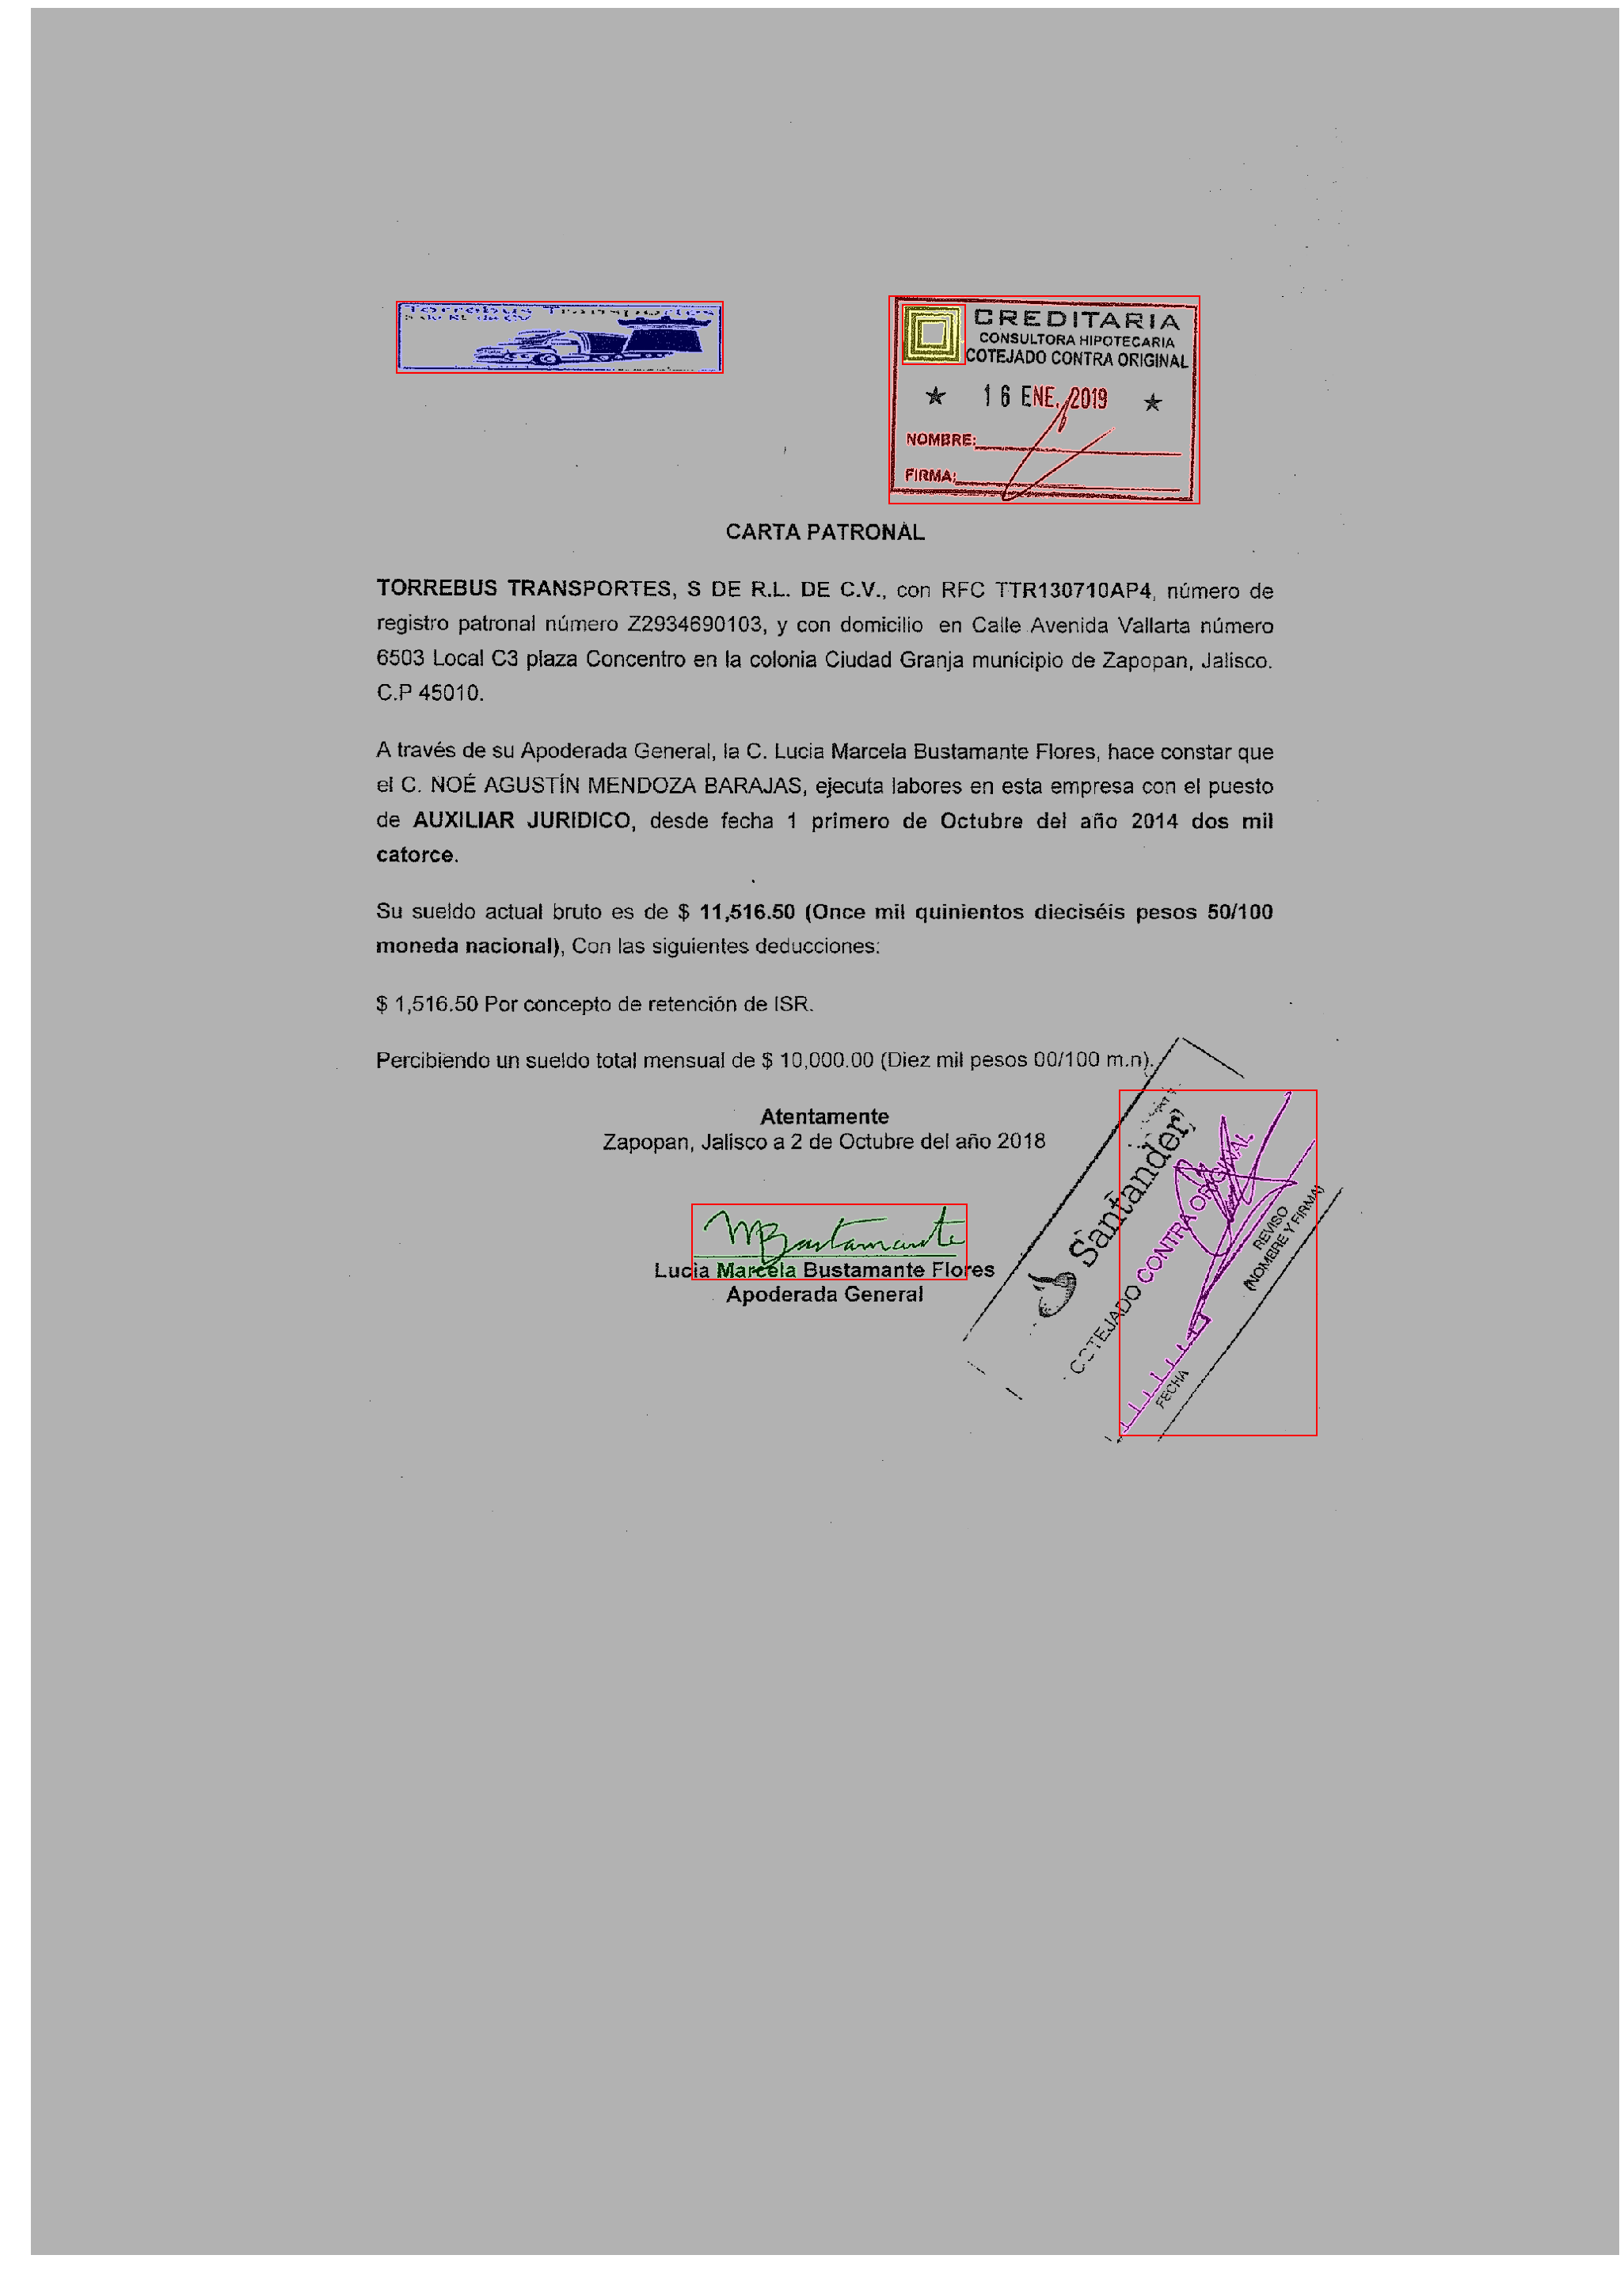

In [62]:
draw_bbox(b, original)